<a href="https://colab.research.google.com/github/aliyusifov99/Hollywood-Theatrical-Market-Synopsis-1995-to-2021/blob/main/Hollywood_Theatrical_Market_Synopsis_1995_to_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necesssary libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Importin the datasets

In [98]:
AnnualTicketSales = pd.read_csv('AnnualTicketSales.csv')
HighestGrossers = pd.read_csv('HighestGrossers.csv')
PopularCreativeTypes = pd.read_csv('PopularCreativeTypes.csv')
TopDistributors = pd.read_csv('TopDistributors.csv')
TopGenres = pd.read_csv('TopGenres.csv')
TopGrossingRatings = pd.read_csv('TopGrossingRatings.csv')
TopGrossingSources = pd.read_csv('TopGrossingSources.csv')
TopProductionMethods = pd.read_csv('TopProductionMethods.csv')
WideReleasesCount = pd.read_csv('WideReleasesCount.csv')

I will try to analyze each dataset seperately in this notebook

### Annual Ticket Sales analysis

In [99]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [100]:
#The number of of null values
AnnualTicketSales.isnull().sum()

YEAR                                    0
TICKETS SOLD                            0
TOTAL BOX OFFICE                        0
TOTAL INFLATION ADJUSTED BOX OFFICE     0
AVERAGE TICKET PRICE                    0
Unnamed: 5                             27
dtype: int64

In [101]:
# Removing Unnecessay Unnamed: 5 column
AnnualTicketSales = AnnualTicketSales.drop('Unnamed: 5', axis=1)

In [102]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97


In [103]:
AnnualTicketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   YEAR                                 27 non-null     int64 
 1   TICKETS SOLD                         27 non-null     object
 2   TOTAL BOX OFFICE                     27 non-null     object
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object
 4   AVERAGE TICKET PRICE                 27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


As we see type of our some values are object. We need to convert them to integer and float first. 

In [104]:
#Converting TICKET SOLD from object to int
AnnualTicketSales['TICKETS SOLD']=AnnualTicketSales['TICKETS SOLD'].replace(',','', regex=True)
AnnualTicketSales['TICKETS SOLD']=pd.to_numeric(AnnualTicketSales['TICKETS SOLD'])

#Converting TOTAL BOX OFFICE from object to int
AnnualTicketSales['TOTAL BOX OFFICE']=AnnualTicketSales['TOTAL BOX OFFICE'].replace(',','', regex=True)
AnnualTicketSales['TOTAL BOX OFFICE']=AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$','', regex=True)
AnnualTicketSales['TOTAL BOX OFFICE']=pd.to_numeric(AnnualTicketSales['TOTAL BOX OFFICE'])

#Converting TOTAL INFLATION ADJUSTED BOX OFFICE from object to int
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].replace(',','', regex=True)
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$','', regex=True)
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']=pd.to_numeric(AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'])


#Converting AVERAGE TICKET PRICE from object to int
AnnualTicketSales['AVERAGE TICKET PRICE']=AnnualTicketSales['AVERAGE TICKET PRICE'].replace(',','', regex=True)
AnnualTicketSales['AVERAGE TICKET PRICE']=AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$','', regex=True)
AnnualTicketSales['AVERAGE TICKET PRICE']=pd.to_numeric(AnnualTicketSales['AVERAGE TICKET PRICE'])


In [105]:
#Final DataFrame
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


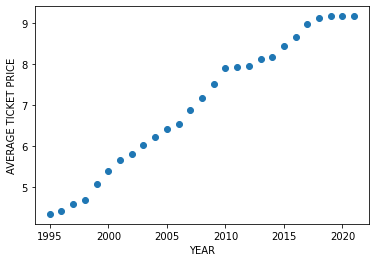

In [89]:
# Average Ticket Price change yearly
figure=plt.Figure()
plt.scatter(AnnualTicketSales['YEAR'], AnnualTicketSales['AVERAGE TICKET PRICE'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('YEAR')
plt.title('AVERAGE TICKET PRICE PER YEAR')
plt.show()

From scatter plot we can observe that Ticket Price has been increased from 3 dollar to around 10$ throughout these years.

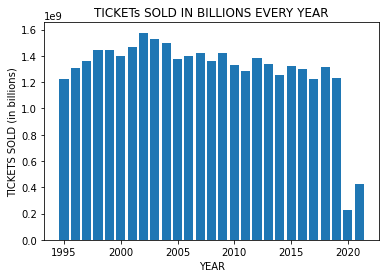

In [96]:
# Total tickets sold every year
plt.bar(AnnualTicketSales['YEAR'], AnnualTicketSales['TICKETS SOLD'])
plt.xlabel("YEAR")
plt.ylabel("TICKETS SOLD (in billions)")
plt.title("TICKETS SOLD IN BILLIONS EVERY YEAR")
plt.show()

From the barplot we can see that total tickets sold fro 1995 till 2020 did not change much. Only last 2 years we can observe the lowest values.

In [111]:
#Total Box Office and Inflation from 1995 to 2020
fig = go.Figure()

# Add graph object
fig.add_trace(go.Scatter(x=AnnualTicketSales['YEAR'],
                        y=AnnualTicketSales['TOTAL BOX OFFICE'],
                        mode='markers+lines',
                        name='TOTAL BOX OFFICE',
                        marker=dict(color='rgba(200, 148, 237,.7)')))

fig.add_trace(go.Scatter(x=AnnualTicketSales['YEAR'],
                        y=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'],
                        mode='markers+lines',
                        name='TOTAL INFLATION ADJUSTED BOX OFFICE',
                        marker=dict(color='rgba(205, 210, 250,.7)')))

# Update layout
fig.update_layout(title='TOTAL BOX OFFICE AND INFLATION EACH YEAR',
                 yaxis=dict(showgrid=False, showline=True, linecolor='rgb(0,0,0)', title='USD'),
                 xaxis=dict(showgrid=False, showline=True, linecolor='rgb(0,0,0)', title='YEAR'),
                 paper_bgcolor='rgb(255,255,255)',
                 plot_bgcolor='rgb(255,255,255)',
                 hovermode='x unified')

# Add annotation with arrow
fig.add_annotation(x=AnnualTicketSales.iloc[AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].argmax()].YEAR,
                    y=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'][AnnualTicketSales.YEAR==AnnualTicketSales.iloc[AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].argmax()].YEAR].values[0],
                    text='Highest TOTAL INFLATION BOX OFFICE')

fig.add_annotation(x=AnnualTicketSales.iloc[AnnualTicketSales['TOTAL BOX OFFICE'].argmax()].YEAR,
                    y=AnnualTicketSales['TOTAL BOX OFFICE'][AnnualTicketSales.YEAR==AnnualTicketSales.iloc[AnnualTicketSales['TOTAL BOX OFFICE'].argmax()].YEAR].values[0],
                    text='Highest TOTAL BOX OFFICE')
fig.show()

From the graph we can see that Highest total iflation box office happened in 2002,  however highest total box office was observed in 2018.

Now we can analyze the correlation between Ticket Price and other variables including 'TICKETS SOLD', 'TOTAL BOX OFFICE' and 'TOTAL BOX OFFICE ADJUSTED INFLATION'

In [112]:
#Correlation matrix
cormat=AnnualTicketSales.corr()
round(cormat,2)

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
YEAR,1.00,-0.55,0.30,-0.55,0.99
TICKETS SOLD,-0.55,1.00,0.62,1.00,-0.48
TOTAL BOX OFFICE,0.30,0.62,1.00,0.62,0.39
TOTAL INFLATION ADJUSTED BOX OFFICE,-0.55,1.00,0.62,1.00,-0.48
AVERAGE TICKET PRICE,0.99,-0.48,0.39,-0.48,1.00


From the values we can see that there the correlation between Average Ticket Price and other value are not that strong. Let's plot it!

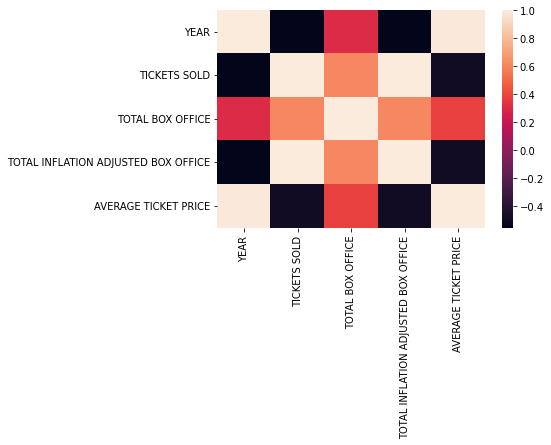

In [119]:
# plotting the correlation matrix 
sns.heatmap(cormat)

From this correlation graph we can observe that there is actually correlation. Now let's observe it in the plots.

Text(0.5, 0, 'TOTAL INFLATION ADJUSTED BOX OFFICE')

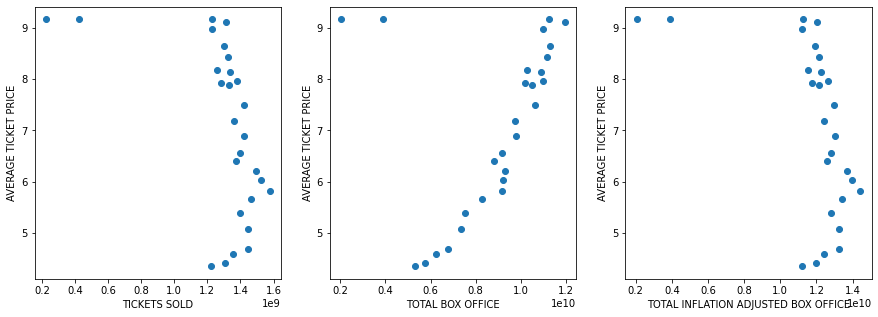

In [135]:
#plotting AVERAGE TICKET PRICE AND other variables in subplots to observe the correlation

plt_1=plt.figure(figsize=[15,5])
#plot 1
plt.subplot(1,3,1)
plt.scatter(y=AnnualTicketSales['AVERAGE TICKET PRICE'], x=AnnualTicketSales['TICKETS SOLD'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('TICKETS SOLD')

#plot 2
plt.subplot(1,3,2)
plt.scatter(y=AnnualTicketSales['AVERAGE TICKET PRICE'], x=AnnualTicketSales['TOTAL BOX OFFICE'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('TOTAL BOX OFFICE')

#plot 3
plt.subplot(1,3,3)
plt.scatter(y=AnnualTicketSales['AVERAGE TICKET PRICE'], x=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('TOTAL INFLATION ADJUSTED BOX OFFICE')


If we remove the outliers we can see there is positive correlation on Total Box Office and somehow negative correlation with Tickets Sold and Inflation, but it is not strong. That is all from Annula Ticket Sales data.

### Highest Grossers 